# <u>TP2</u>

## par Antoine Boissinot  - -  François Gaudreault  - -  Béatrice Lessard-Hamel

## Présenté à M. Philippe Després

### Date de remise : 5 mars 2021

In [2]:
import numpy as np
from numpy import exp, linspace
from pylab import plot, show, xlabel, ylabel, grid

## Numéro 1  

## Numéro 2 

## Numéro 3  

## Numéro 4  

## Numéro 5  

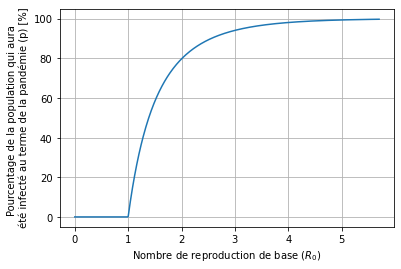

In [3]:
def p_graph(R0_max,start, accuracy, steps):
    

#--Calcul itératif du pourcentage de la population qui aura été infecté au terme de la pandémie

    #--Paramètres:
    #   R0_max: Nombre de reproduction de base maximale en supposant que le fluctuation commence à 0
    #   start: Valeur de départ pour l'itérations allant de 0.1 à 1.4
    #   accuracy: précision de l'erreur de p
    #   steps: Bonds par itérations

    #--Retourne un graphique de p en fonction de R0

    points = int(R0_max / steps)


# Liste pour le graphique

    y = []
    temp = linspace(0, R0_max, points)

# R0 loop

    for R0 in temp:
        p1 = start
        error = 1.0
    
    # Loop jusqu'à l'erreur établie
    
        while error > accuracy:
            p1,p2 = 1 - exp(-R0*p1),p1
            error = abs((p1-p2)/(1 - 1 / (R0 * exp(-R0 * p1))))
        
        # Ajout des valeurs convergées et transformation en pourcentage
        
        y.append(100 * p1)
    
#Graphique    
    
    plot(temp,y)
    xlabel("Nombre de reproduction de base ($R_0$)")
    ylabel("Pourcentage de la population qui aura \n été infecté au terme de la pandémie (p) [%]")
    grid()
    show()
        
np.seterr(divide = 'ignore')
p_graph(5.7,1,1e-6,0.01)

## Numéro 6  
Selon le début de démarche présenté dans l'énoncé, on sait que $x'$ est représenté selon la méthode de relaxation accélérée comme suit :
$$ x'=(1+\omega)f(x)-\omega x.$$
Sachant que $x^{*} = f(x^{*})$, il est possible de redéfinir $x'$ en faisant son développement en série de Taylor comme suit :
$$x'  = ((1+\omega)f'(x^{*})-\omega)(x-x^{*}) + f(x^{*}) + ...~;$$
$$\Rightarrow x'  \simeq ((1+\omega)f'(x^{*})-\omega)(x-x^{*}) + x^{*}.$$
Comme $\varepsilon = x - x^{*}$ et que $\varepsilon ' = x' - x^{*}$, on obtient :
$$x' - x^{*} = [(1+\omega)f'(x^{*})-\omega](x-x^{*})~; $$
$$\Rightarrow \varepsilon ' = [(1+\omega)f'(x^{*})-\omega]\varepsilon~;$$
$$\Rightarrow \varepsilon = \frac{\varepsilon'}{(1+\omega)f'(x^{*})-\omega}.$$
En réinsérant les termes dans $x^{*} = x' +\varepsilon'$, on obtient : 
$$x^{*} = x' +\varepsilon'~;$$
$$\Rightarrow \varepsilon' =x^{*} - x' ; $$
$$= x + \varepsilon - x' ; $$
$$= x + \frac{\varepsilon'}{(1+\omega)f'(x^{*})-\omega} - x'~;$$
$$\Rightarrow \varepsilon' \left(1 - \frac{1}{(1+\omega)f'(x^{*})-\omega}\right) = x-x'.$$
Finalement, on obtient : 
$$ \therefore \varepsilon' \simeq \frac{x-x'}{1-1/[(1+\omega)f'(x^{*})-\omega]}.$$

## Numéro 7  

In [4]:
def p_nb_iter(R0,start,accuracy):
    
    #--Calcul du nombre d'itération du pourcentage de la population qui aura été infecté au terme de la pandémie
    #--Selon la méthode de relaxation

    #--Paramètres:
    #   R0: Nombre de reproduction de base 
    #   start: Valeur de départ pour l'itérations allant de 0.1 à 1.4
    #   accuracy: précision de l'erreur de p

    #--Retourne le nombre d'itération et la solution convergente à la précision préétablie selon la méthode de relaxation
    
    iteration = 1
    def f(p):
        return 1 - exp(- R0 * p)

    def error(p1, p2):
        return (p1 - p2) / (1 - 1 / (R0 * exp(-R0 * p1)))

    p1 = start # valeur de départ
    p2 = f(p1)
    while(abs(error(p1, p2)) > accuracy):
        p1, p2 = p2, f(p2)
        iteration += 1
    print("Nombre d'itérations : ",iteration)
    print("Valeur de p : {:.2f}%".format(p2*100))
p_nb_iter(2,1,1e-6)


Nombre d'itérations :  14
Valeur de p : 79.68%


## Numéro 8  

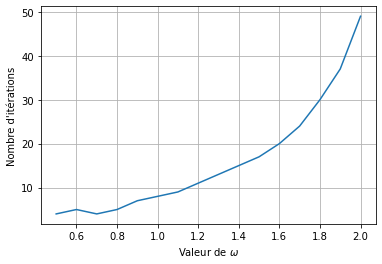

In [5]:
def over_relax(R0, start, omega, accuracy):
    #--Calcul du nombre d'itération du pourcentage de la population qui aura été infecté au terme de la pandémie
    #--Selon la méthode de relaxation accélérée

    #--Paramètres:
    #   R0: Nombre de reproduction de base 
    #   start: Valeur de départ pour l'itérations allant de 0.1 à 1.4
    #   omega: paramètre de relaxation accélérée
    #   accuracy: précision de l'erreur de p

    #--Retourne le nombre d'itération selon la méthode de relaxation accélérée
    
    iterations = 1

    def f(p):
        return 1 - exp(- R0 * p)

    def f_derive(p):
        return R0 * exp(- R0 * p)

    def error(p1, p2):
        return (p1 - p2) / (1 - 1 / ((1 + omega) * f_derive(p1) - omega))

    p1 = start  # valeur de départ
    p2 = (1 + omega) * f(p1) - omega * p1
    while abs(error(p1, p2)) > accuracy:
        p1, p2 = p2, (1 + omega) * f(p2) - omega * p2
        iterations += 1
    return iterations

def over_graph(R0,start,accuracy):
    #-- Calcul le graphique du nombre d'itération de la méthode de relaxation accélérée selon le paramètre omega partant 
    #-- de 0.5 en allant jusqu'à 2 en bond de 0.1
    
    #--Paramètres:
    #   R0: Nombre de reproduction de base 
    #   start: Valeur de départ pour l'itérations allant de 0.1 à 1.4
    #   accuracy: précision de l'erreur de p

    #--Retourne un graphique du nombre d'itération selon le paramètre de relaxation accélérée
    
    
    y = []
    temp = linspace(0.5,2,16)
    
    for omega in temp:
        iterations = over_relax(R0,start,omega, accuracy)
        
        y.append(iterations)
        
    #Graphique    
    
    plot(temp,y)
    xlabel("Valeur de $\omega$")
    ylabel("Nombre d'itérations")
    grid()
    show()
    
over_graph(2,1,1e-6)

## Numéro 9  
Il est possible de vouloir utiliser un $\omega < 0$, si les bonds d'itérations sont trop grands et que l'algorithme passe tout droit de la solution. Par exemple, on commence à $x = 3$ et, à la prochaine itération, on obtient $x' = 4$, mais en fait la réponse est à $x^{*} = 3.14$. En bref, il faut réduire la *petite tape dans le dos* afin d'arriver à la solution sans la dépasser. 